NameError: name 'dft' is not defined

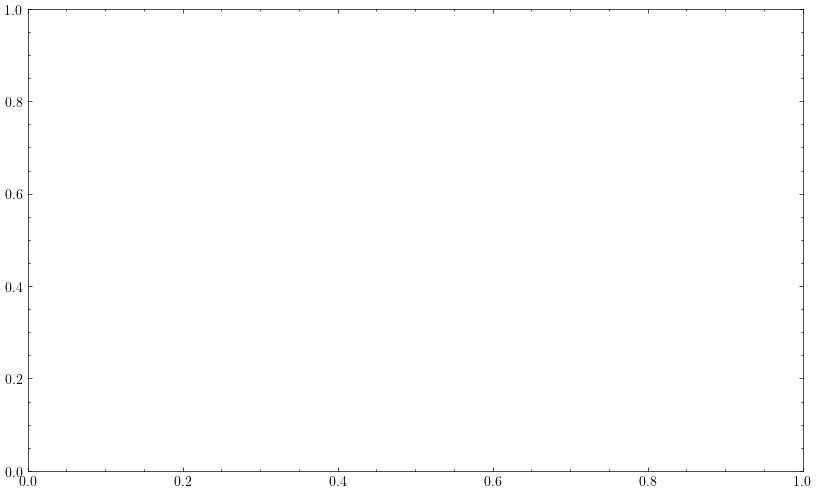

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots

plt.style.use("science")

# Load the already normalized NEXAFS data
raw = pd.read_csv("/home/hduva/projects/xrr_notebooks/fitting/normalized_dft_nexafs.csv")
exp = pd.read_csv("/home/hduva/projects/xrr_notebooks/fitting/normalized_nexafs.csv")


# Create a nice and pretty plot
def plot_dft(fig, ax, raw, dft):
    """Plot raw and DFT data."""
    sns.lineplot(
        data=raw,
        x="Energy",
        y="Normalized Intensity",
        hue="Angle",
        palette="viridis",
        linewidth=2.5,
        ax=ax,
        alpha=0.5,
    )
    sns.lineplot(
        data=dft,
        x="Energy",
        y="Normalized Intensity",
        hue="Angle",
        palette="viridis",
        linewidth=2.5,
        linestyle="--",
        ax=ax,
        legend=False,
    )

    # Customize the plot
    ax.set_xlabel("Energy (eV)", fontsize=14, fontweight="bold")
    ax.set_ylabel(r"$\beta (\theta)$", fontsize=14, fontweight="bold")
    ax.set_title(
        "Normalized Experimental NEXAFS Data", fontsize=16, fontweight="bold", pad=20
    )
    # Use scientific notation for y-axis
    ax.ticklabel_format(style="scientific", axis="y", scilimits=(0, 0))
    ax.set_xlim(283, 295)

    # Customize legend
    legend = ax.legend(
        title="Angle (degrees)",
        title_fontsize=12,
        fontsize=11,
        frameon=True,
        fancybox=False,
        shadow=False,
    )
    legend.get_frame().set_facecolor("white")
    legend.get_frame().set_alpha(0.9)

    # Add grid and styling
    ax.grid(True, alpha=0.3, linestyle="--")
    ax.tick_params(direction="in", labelsize=11)


fig, ax = plt.subplots(figsize=(10, 6))
plot_dft(fig, ax, raw, dft)
# Adjust layout and save
plt.tight_layout()
# plt.savefig("nexafs_normalized.png", dpi=300, bbox_inches="tight")
plt.show()

NameError: name 'dft' is not defined

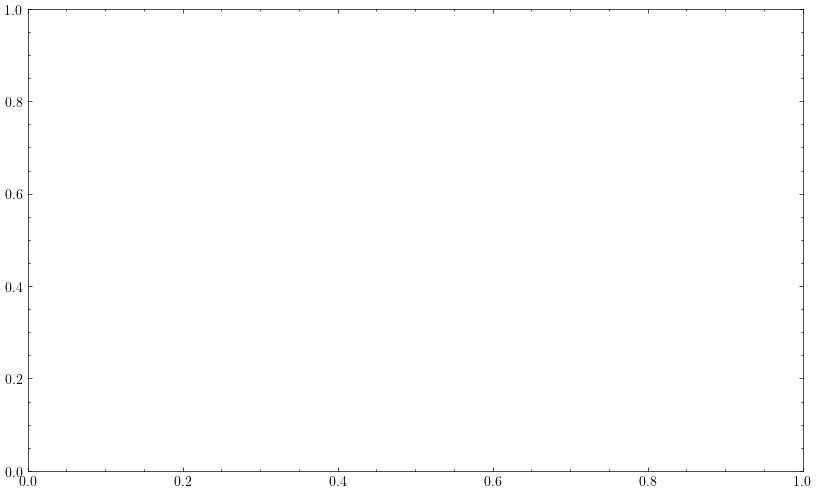

In [4]:
energy_vals = [
    250.0,
    275.0,
    280.0,
    281.0,
    281.2,
    281.4,
    281.6,
    281.8,
    282.0,
    282.3,
    282.5,
    282.7,
    282.9,
    283.1,
    283.3,
    283.5,
    283.7,
    284.2,
    285.1,
    287.0,
    289.0,
]
# Highlight the energies used in the fitting

fig, ax = plt.subplots(figsize=(10, 6))
plot_dft(fig, ax, raw, dft)
for ev in energy_vals:
    ax.axvline(ev, color="k", linestyle="--", alpha=0.3)
# Adjust layout and save
plt.tight_layout()
# plt.savefig("nexafs_normalized_with_energies.png", dpi=300, bbox_inches="tight")
plt.show()

(-0.001, 0.003)

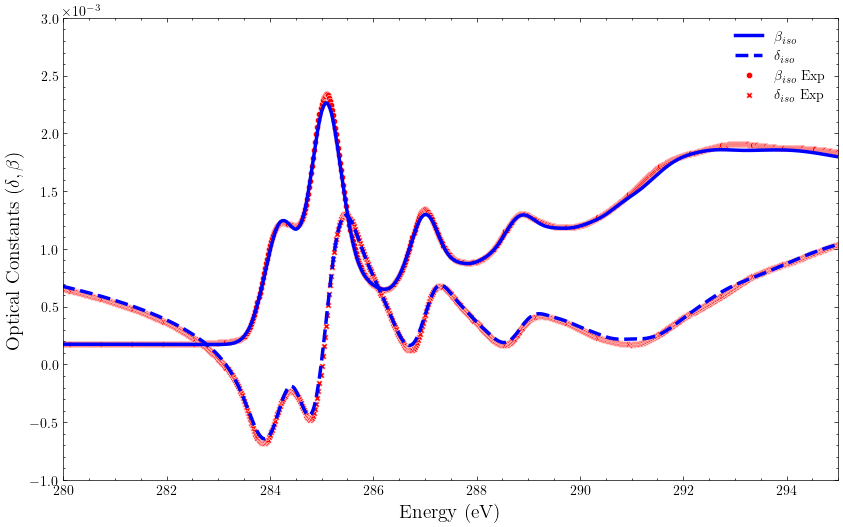

In [9]:
import seaborn as sns
#  pull in the optical tensor components.

dft_optical_components = pd.read_csv("fitting/optical_constants.csv")
dft_optical_components["n_biso"] = (
    2 * dft_optical_components["n_ixx"] + dft_optical_components["n_izz"]
) / 3
dft_optical_components["n_diso"] = (
    2 * dft_optical_components["n_xx"] + dft_optical_components["n_zz"]
) / 3

exp_optical_components = pd.read_csv("fitting/optical_constants_exp.csv")
exp_optical_components["n_biso"] = (
    2 * exp_optical_components["n_ixx"] + exp_optical_components["n_izz"]
) / 3
exp_optical_components["n_diso"] = (
    2 * exp_optical_components["n_xx"] + exp_optical_components["n_zz"]
) / 3

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_biso",
    label=r"$\beta_{iso}$",
    color="blue",
    linewidth=2.5,
    ax=ax,
)
sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_diso",
    label=r"$\delta_{iso}$",
    color="blue",
    linewidth=2.5,
    linestyle="--",
    ax=ax,
)
# Scatter plot with the experimental results
sns.scatterplot(
    data=exp_optical_components,
    x="energy",
    y="n_biso",
    label=r"$\beta_{iso}$ Exp",
    color="red",
    s=20,
    ax=ax,
)
sns.scatterplot(
    data=exp_optical_components,
    x="energy",
    y="n_diso",
    label=r"$\delta_{iso}$ Exp",
    color="red",
    s=20,
    marker="X",
    ax=ax,
)
ax.set_xlabel("Energy (eV)", fontsize=14, fontweight="bold")
ax.set_ylabel(r"Optical Constants $(\delta, \beta)$", fontsize=14, fontweight="bold")
ax.ticklabel_format(style="scientific", axis="y", scilimits=(0, 0))
ax.set_xlim(280, 295)
ax.set_ylim(-0.001, 0.003)

In [10]:
raw

,Energy,Intensity,Angle,Normalized Intensity
0,270.19992,5061.9155,20,0.000182
1,270.30038,5061.1460,20,0.000182
2,270.40048,5058.9800,20,0.000182
3,270.50085,5055.7681,20,0.000182
4,270.60025,5051.9160,20,0.000182
...,...,...,...,...
2990,329.60010,27137.0310,90,0.000824
2991,329.70013,27120.6640,90,0.000823
2992,329.79932,27107.0390,90,0.000823
2993,329.90030,27097.8500,90,0.000823


In [11]:
from kkcalc import kk

calc_exp = kk.kk_calculate_real(
    raw[raw["Angle"] == 55][["Energy", "Intensity"]].values,
    "C32H16N8Zn1",
    input_data_type="beta",
    load_options=None,
    merge_points=[
        raw[raw["Angle"] == 55]["Energy"].min(),
        raw[raw["Angle"] == 55]["Energy"].max(),
    ],
    add_background=False,
    curve_tolerance=0.01,
    curve_recursion=100,
)
stoichiometry = kk.data.ParseChemicalFormula("C32H16N8Zn1")
mass = kk.data.calculate_FormulaMass(stoichiometry)

exp_i = kk.data.convert_data(
    calc_exp[:, [0, 2]], "ASF", "refractive_index", Density=1, Formula_Mass=mass
)
exp_r = kk.data.convert_data(
    calc_exp[:, [0, 1]], "ASF", "refractive_index", Density=1, Formula_Mass=mass
)

In [12]:
energies = raw[raw["Angle"] == 55]["Energy"].values
# Create a DataFrame with the energies and the corresponding values
exp_optical_components = pd.DataFrame(
    {
        "Energy": energies,
        "n_biso": np.interp(energies, exp_i[:, 0], exp_i[:, 1]),
        "n_diso": np.interp(energies, exp_r[:, 0], exp_r[:, 1]),
    }
)

(-0.001, 0.003)

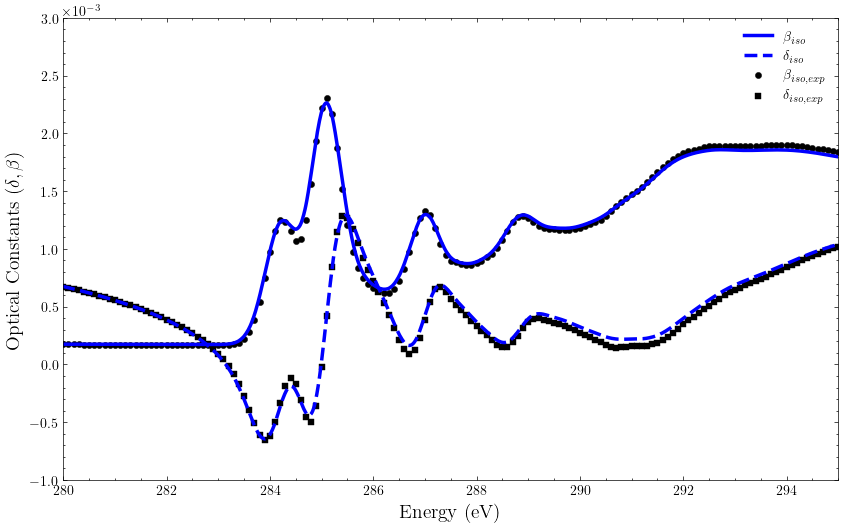

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_biso",
    label=r"$\beta_{iso}$",
    color="blue",
    linewidth=2.5,
    ax=ax,
)
sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_diso",
    label=r"$\delta_{iso}$",
    color="blue",
    linewidth=2.5,
    linestyle="--",
    ax=ax,
)
sns.scatterplot(
    data=exp_optical_components,
    x="Energy",
    y="n_biso",
    label=r"$\beta_{iso, exp}$",
    color="k",
    s=20,
    edgecolor=None,
    linewidth=0.3,
    ax=ax,
)
sns.scatterplot(
    data=exp_optical_components,
    x="Energy",
    y="n_diso",
    label=r"$\delta_{iso, exp}$",
    color="k",
    s=20,
    marker="s",
    edgecolor=None,
    linewidth=0.3,
    ax=ax,
)
ax.set_xlabel("Energy (eV)", fontsize=14, fontweight="bold")
ax.set_ylabel(r"Optical Constants $(\delta, \beta)$", fontsize=14, fontweight="bold")
ax.ticklabel_format(style="scientific", axis="y", scilimits=(0, 0))
ax.set_xlim(280, 295)
ax.set_ylim(-0.001, 0.003)

(0.0, 0.03717718934999997)

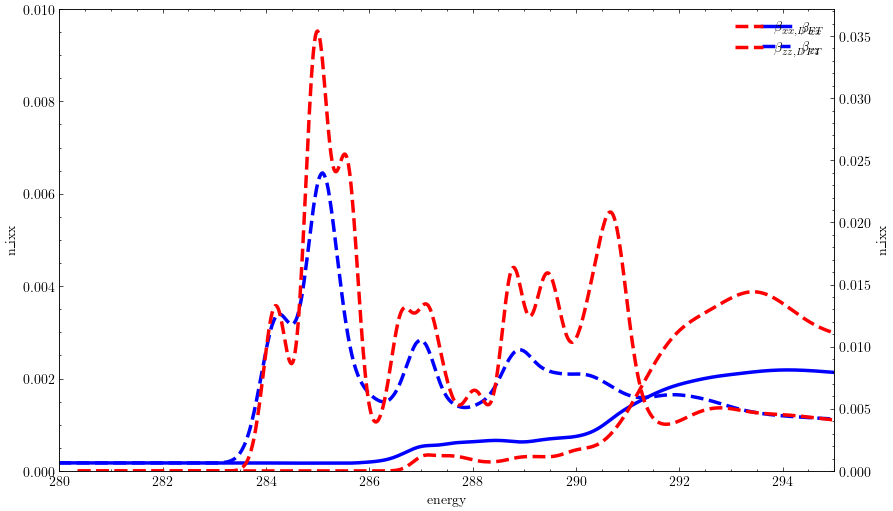

In [16]:
raw_dft = pd.read_csv("fitting/dft_raw_oocs.csv")
raw_dft.rename(
    columns={"eV_": "energy", "xxTotalf0": "n_ixx", "zzTotalf0": "n_izz"},
    inplace=True,
)
k_edge = (dft_optical_components["energy"] > 280) & (
    dft_optical_components["energy"] < 285
)
# find the energy corresponding to the max peak in this range
pi_peak = dft_optical_components[k_edge]["n_biso"].idxmax()
pi_peak_raw = raw_dft["n_izz"].idxmax()
shift = (
    dft_optical_components.loc[pi_peak, "energy"] - raw_dft.loc[pi_peak_raw, "energy"]
)
raw_dft["energy"] = raw_dft["energy"] + shift

fig, ax = plt.subplots(figsize=(10, 6))
twinx = ax.twinx()
sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_ixx",
    label=r"$\beta_{xx}$",
    color="blue",
    linewidth=2.5,
    ax=ax,
)
sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_izz",
    label=r"$\beta_{zz}$",
    color="blue",
    linewidth=2.5,
    linestyle="--",
    ax=ax,
)
sns.lineplot(
    data=raw_dft,
    x="energy",
    y="n_ixx",
    label=r"$\beta_{xx, DFT}$",
    color="red",
    linewidth=2.5,
    linestyle="--",
    ax=twinx,
)
sns.lineplot(
    data=raw_dft,
    x="energy",
    y="n_izz",
    label=r"$\beta_{zz, DFT}$",
    color="red",
    linewidth=2.5,
    linestyle="--",
    ax=twinx,
)

ax.set_xlim(280, 295)
ax.set_ylim(0, 0.01)
twinx.set_ylim(0, None)

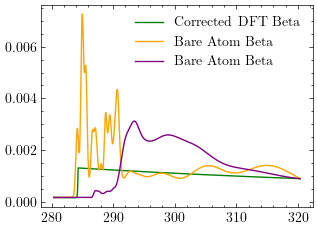

In [17]:
from periodictable.xsf import index_of_refraction

beta_bare_atom = -index_of_refraction(
    "C32H16N8Zn1", density=1.0, energy=raw_dft["energy"].values * 1e-3
).imag
# calculate the intensity scale and energy shift to alight the raw dft beta spectrum with
# the beta_bare_atom results in the pre and post edge regions
# corrected = raw_dft["n_biso"] * scale + shift


# compute scale and shift to exactly match first and last points
def scale_shift(raw_y0, raw_y1, target0, target1):
    if abs(raw_y1 - raw_y0) > 1e-20:
        scale = (target1 - target0) / (raw_y1 - raw_y0)
        shift = target0 - scale * raw_y0
    else:
        # fallback to mean-based estimate if raw endpoints are (almost) equal
        scale = target1 / raw_y1
        shift = target0 - scale * raw_y0
    return scale, shift


raw_y0z = raw_dft["n_izz"].iloc[0]
raw_y1z = raw_dft["n_izz"].iloc[-1]
raw_y0x = raw_dft["n_ixx"].iloc[0]
raw_y1x = raw_dft["n_ixx"].iloc[-1]
target0 = beta_bare_atom[0]
target1 = beta_bare_atom[-1]

scale_z, shift_z = scale_shift(raw_y0z, raw_y1z, target0, target1)
scale_x, shift_x = scale_shift(raw_y0x, raw_y1x, target0, target1)

corrected_z = raw_dft["n_izz"] * scale_z + shift_z
corrected_x = raw_dft["n_ixx"] * scale_x + shift_x

plt.plot(raw_dft["energy"], beta_bare_atom, label="Corrected DFT Beta", color="green")
plt.plot(
    raw_dft["energy"],
    corrected_z,
    label="Bare Atom Beta",
    color="orange",
)
plt.plot(
    raw_dft["energy"],
    corrected_x,
    label="Bare Atom Beta",
    color="purple",
)
plt.legend()

raw_dft["n_izz"] = corrected_z
raw_dft["n_ixx"] = corrected_x

In [18]:
#  kk calculate the n_diso
calc_raw_xx = kk.kk_calculate_real(
    raw_dft[["energy", "n_ixx"]].values,
    "C32H16N8Zn1",
    input_data_type="beta",
    load_options=None,
    merge_points=[
        raw_dft["energy"].min(),
        raw_dft["energy"].max(),
    ],
    add_background=False,
    curve_tolerance=0.01,
    curve_recursion=100,
)
calc_raw_zz = kk.kk_calculate_real(
    raw_dft[["energy", "n_izz"]].values,
    "C32H16N8Zn1",
    input_data_type="beta",
    load_options=None,
    merge_points=[
        raw_dft["energy"].min(),
        raw_dft["energy"].max(),
    ],
    add_background=False,
    curve_tolerance=0.01,
    curve_recursion=100,
)
stoichiometry = kk.data.ParseChemicalFormula("C32H16N8Zn1")
mass = kk.data.calculate_FormulaMass(stoichiometry)

raw_izz = kk.data.convert_data(
    calc_raw_zz[:, [0, 2]], "ASF", "refractive_index", Density=1, Formula_Mass=mass
)
raw_zz = kk.data.convert_data(
    calc_raw_zz[:, [0, 1]], "ASF", "refractive_index", Density=1, Formula_Mass=mass
)
raw_ixx = kk.data.convert_data(
    calc_raw_xx[:, [0, 2]], "ASF", "refractive_index", Density=1, Formula_Mass=mass
)
raw_xx = kk.data.convert_data(
    calc_raw_xx[:, [0, 1]], "ASF", "refractive_index", Density=1, Formula_Mass=mass
)

dense_energies = dft_optical_components["energy"].values

raw_optical_components = pd.DataFrame(
    {
        "energy": dense_energies,
        "n_ixx": np.interp(dense_energies, raw_ixx[:, 0], raw_ixx[:, 1]),
        "n_izz": np.interp(dense_energies, raw_izz[:, 0], raw_izz[:, 1]),
        "n_xx": np.interp(dense_energies, raw_xx[:, 0], raw_xx[:, 1]),
        "n_zz": np.interp(dense_energies, raw_zz[:, 0], raw_zz[:, 1]),
    }
)

In [23]:
# rename the Energy column to energy inside exp_optical_components
exp_optical_components.rename(columns={"Energy": "energy"}, inplace=True)


ValueError: Could not interpret value `n_ixx` for `y`. An entry with this name does not appear in `data`.

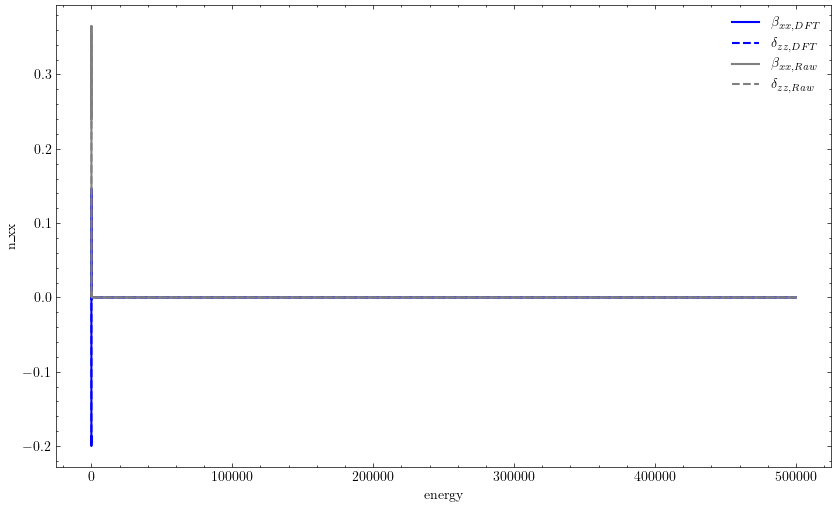

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_xx",
    label=r"$\beta_{xx, DFT}$",
    color="blue",
    linewidth=1.5,
    ax=ax,
)
sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_zz",
    label=r"$\delta_{zz, DFT}$",
    color="blue",
    linewidth=1.5,
    linestyle="--",
    ax=ax,
)
sns.lineplot(
    data=raw_optical_components,
    x="energy",
    y="n_ixx",
    label=r"$\beta_{xx, Raw}$",
    color="grey",
    linewidth=1.5,
    ax=ax,
)
sns.lineplot(
    data=raw_optical_components,
    x="energy",
    y="n_izz",
    label=r"$\delta_{zz, Raw}$",
    color="grey",
    linewidth=1.5,
    linestyle="--",
    ax=ax,
)
sns.scatterplot(
    data=exp_optical_components,
    x="energy",
    y="n_ixx",
    label=r"$\beta_{xx, exp}$",
    color="k",
    s=10,
    edgecolor=None,
    linewidth=0.3,
    ax=ax,
)
sns.scatterplot(
    data=exp_optical_components,
    x="energy",
    y="n_xx",
    label=r"$\delta_{xx, exp}$",
    color="k",
    s=10,
    marker="s",
    edgecolor=None,
    linewidth=0.3,
    ax=ax,
)
sns.scatterplot(
    data=exp_optical_components,
    x="energy",
    y="n_izz",
    label=r"$\delta_{zz, exp}$",
    color="k",
    s=10,
    marker="^",
    edgecolor=None,
    linewidth=0.3,
    ax=ax,
)
sns.scatterplot(
    data=exp_optical_components,
    x="energy",
    y="n_izz",
    label=r"$\beta_{zz, exp}$",
    color="k",
    s=10,
    marker="v",
    edgecolor=None,
    linewidth=0.3,
    ax=ax,
)
ax.set_xlabel("Energy (eV)", fontsize=14, fontweight="bold")
ax.set_ylabel(r"Optical Constants $(\delta, \beta)$", fontsize=14, fontweight="bold")
ax.ticklabel_format(style="scientific", axis="y", scilimits=(0, 0))
ax.set_xlim(280, 295)
ax.set_ylim(-0.001, 0.003)

ValueError: Could not interpret value `energy` for `x`. An entry with this name does not appear in `data`.

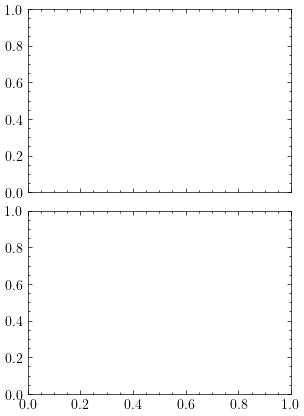

In [20]:
# --------------------------------------------------------------
#  Imports & style (unchanged from your original script)
# --------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

palette = {
    "refined": "blue",
    "raw": "gray",
}  # light gray

# --------------------------------------------------------------
#  Figure & axes (single‑column size)
# --------------------------------------------------------------
fig, (ax_beta, ax_delta) = plt.subplots(
    2,
    1,
    figsize=(3.4, 5.0),  # single‑column width
    sharex=True,
    # sharey="row",
    gridspec_kw=dict(hspace=0.1, wspace=0.1),
)

# --------------------------------------------------------------
#  Plot β (top panel) – suppress the per‑axis legend
# --------------------------------------------------------------

sns.scatterplot(
    data=exp_optical_components.iloc[::10],
    x="energy",
    y="n_ixx",
    label=r"$n_{\mathrm{xx,exp}}$",
    color="k",
    s=10,
    edgecolor="k",
    facecolor="none",
    linewidth=0.8,
    marker="o",
    ax=ax_beta,
    legend=False,
)

sns.lineplot(
    data=raw_optical_components,
    x="energy",
    y="n_ixx",
    label=r"$n_{\mathrm{xx,DFT}}$",
    color="red",
    linewidth=1.5,
    linestyle="--",
    ax=ax_beta,
    legend=False,
)
sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_ixx",
    label=r"$n_{\mathrm{xx,Refined}}$",
    color="red",
    linewidth=1.5,
    ax=ax_beta,
    legend=False,
)
sns.scatterplot(
    data=exp_optical_components.iloc[::10],
    x="energy",
    y="n_izz",
    label=r"$n_{\mathrm{zz,exp}}$",
    color=palette["refined"],
    s=10,
    edgecolor="k",
    facecolor="none",
    linewidth=0.8,
    marker="^",
    ax=ax_beta,
    legend=False,
)
sns.lineplot(
    data=raw_optical_components,
    x="energy",
    y="n_izz",
    label=r"$n_{\mathrm{zz,DFT}}$",
    color="blue",
    linewidth=1.5,
    linestyle="--",
    ax=ax_beta,
    legend=False,
)

sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_izz",
    label=r"$n_{\mathrm{zz,Refined}}$",
    color="blue",
    linewidth=1.5,
    linestyle="-",
    ax=ax_beta,
    legend=False,
)


ax_beta.set_ylabel(r"$\beta$ (a.u.)", fontsize=12, fontweight="bold")
ax_beta.set_ylim(0, 0.008)
ax_beta.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax_beta.tick_params(axis="both", which="major", labelsize=10)

# Add panel label (a)
ax_beta.text(
    0.02,
    0.95,
    "(a)",
    transform=ax_beta.transAxes,
    fontsize=12,
    fontweight="bold",
    verticalalignment="top",
    horizontalalignment="left",
)

# --------------------------------------------------------------
#  Plot δ (bottom panel) – also suppress the per‑axis legend
# --------------------------------------------------------------

sns.scatterplot(
    data=exp_optical_components.iloc[::10],
    x="energy",
    y="n_xx",
    label=r"$\delta_{\mathrm{xx,exp}}$",
    color="k",
    s=10,
    edgecolor="k",
    facecolor="none",
    linewidth=0.8,
    marker="o",
    ax=ax_delta,
    legend=False,
)
sns.lineplot(
    data=raw_optical_components,
    x="energy",
    y="n_xx",
    label=r"$\delta_{\mathrm{xx,RAW}}$",
    color="red",
    linewidth=1.5,
    linestyle="--",
    ax=ax_delta,
    legend=False,
)
sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_xx",
    label=r"$\delta_{\mathrm{xx,Refined}}$",
    color="red",
    linewidth=1.5,
    linestyle="-",
    ax=ax_delta,
    legend=False,
)
sns.scatterplot(
    data=exp_optical_components.iloc[::10],
    x="energy",
    y="n_zz",
    label=r"$\delta_{\mathrm{zz,exp}}$",
    color="k",
    s=10,
    edgecolor="k",
    facecolor="none",
    linewidth=0.8,
    marker="^",
    ax=ax_delta,
    legend=False,
)
sns.lineplot(
    data=raw_optical_components,
    x="energy",
    y="n_zz",
    label=r"$\delta_{\mathrm{zz,RAW}}$",
    color="blue",
    linewidth=1.5,
    linestyle="--",
    ax=ax_delta,
    legend=False,
)
sns.lineplot(
    data=dft_optical_components,
    x="energy",
    y="n_zz",
    label=r"$\delta_{\mathrm{zz,Refined}}$",
    color="blue",
    linewidth=1.5,
    linestyle="-",
    ax=ax_delta,
    legend=False,
)

ax_delta.set_xlabel("Energy (eV)", fontsize=12, fontweight="bold")
ax_delta.set_ylabel(r"$\delta$ (a.u.)", fontsize=12, fontweight="bold")
ax_delta.set_xlim(283, 295)
ax_delta.set_ylim(-0.004, 0.004)
# Set better x-axis ticks
ax_delta.set_xticks([283, 285, 287, 289, 291, 293, 295])
ax_delta.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax_delta.tick_params(axis="both", which="major", labelsize=10)

# Add panel label (b)
ax_delta.text(
    0.02,
    0.95,
    "(b)",
    transform=ax_delta.transAxes,
    fontsize=12,
    fontweight="bold",
    verticalalignment="top",
    horizontalalignment="left",
)


for ax in (ax_beta, ax_delta):
    ax.tick_params(direction="in")
    ax.grid(True, alpha=0.3, linestyle="--")
    ax.ticklabel_format(style="scientific", axis="y", scilimits=(0, 0))

# Grab handles & labels from both axes
handles_beta, labels_beta = ax_beta.get_legend_handles_labels()
handles_delta, labels_delta = ax_delta.get_legend_handles_labels()

# Concatenate while preserving order
all_handles = handles_beta + handles_delta
all_labels = labels_beta + labels_delta

# Remove duplicates (just in case the same label appears twice)
unique = {}
for h, l in zip(all_handles, all_labels):
    if l not in unique:
        unique[l] = h
final_handles = list(unique.values())
final_labels = list(unique.keys())

# -----------------------------------------------------------------
#  Option A – Legend **inside** the top panel (lower‑right corner)
# -----------------------------------------------------------------
ax_beta.legend(
    final_handles[:6],
    final_labels[:6],
    loc="upper right",
    handlelength=0.8,
    fontsize=9,
    frameon=False,
    ncol=2,
)

# --------------------------------------------------------------
#  Tight layout – leave room for the external legend
# --------------------------------------------------------------
# fig.tight_layout(rect=[0, 0, 0.85, 1])  # 0.85 leaves space for the legend on the right
plt.show()
# -----------------------------------------------------------------
fig.savefig(
    "Fig1_tensor.png", dpi=300, bbox_inches="tight"
)  # , bbox_extra_artists=(legend,)